# For  LDM-503-EFDb  

Initialize EFD at USDF

In [6]:
from lsst_efd_client import EfdClient, resample

client = EfdClient('usdf_efd')
client.output = 'dataframe'
cl=usdf_client.influx_client


In [ ]:
## Pick 3  topics

In [11]:
import random
topics = await client.get_topics()

selected_topics = []
results = {}
loc = "usdf"
pick = 3
day = '2023-06-13'
day2 = '2023-06-20'

# want to selct 5 topics randomly but with messages so randomize all indexes 
randoms = random.sample(range(0,len(topics)),len(topics))
for r in randoms:
   topic = topics[r]
   result = []
   if len(selected_topics) < pick:
      query=f'''SELECT * FROM "{topic}" WHERE time >  '{day}T00:00:00.000Z' and time < '{day2}T00:00:00.000Z' '''
      result = await cl.query(query)

   if len(result) > 20:
        print (f"{topic} had {len(result)} messages between {day} and {day2} ")
        selected_topics.append(topic)
        results[topic] = result
        if len(selected_topics) > (pick -1):
            break


print(f"Random selction of {pick} '{loc}' topics {selected_topics} with messages between {day} and {day2}")

lsst.sal.ATPneumatics.logevent_heartbeat had 529266 messages between 2023-06-13 and 2023-06-20 
lsst.sal.MTAirCompressor.logevent_summaryState had 22 messages between 2023-06-13 and 2023-06-20 
lsst.sal.MTM1M3.logevent_raisingLoweringInfo had 6582 messages between 2023-06-13 and 2023-06-20 
Random selction of 3 'usdf' topics ['lsst.sal.ATPneumatics.logevent_heartbeat', 'lsst.sal.MTAirCompressor.logevent_summaryState', 'lsst.sal.MTM1M3.logevent_raisingLoweringInfo'] with messages between 2023-06-13 and 2023-06-20


In [ ]:
## read fields ..

In [13]:
for topic in selected_topics:
   result = results[topic]
   print (f"{topic} has fields:{result.columns}")


lsst.sal.ATPneumatics.logevent_heartbeat has fields:Index(['heartbeat', 'private_efdStamp', 'private_identity',
       'private_kafkaStamp', 'private_origin', 'private_rcvStamp',
       'private_revCode', 'private_seqNum', 'private_sndStamp'],
      dtype='object')
lsst.sal.MTAirCompressor.logevent_summaryState has fields:Index(['private_efdStamp', 'private_identity', 'private_kafkaStamp',
       'private_origin', 'private_rcvStamp', 'private_revCode',
       'private_seqNum', 'private_sndStamp', 'salIndex', 'summaryState'],
      dtype='object')
lsst.sal.MTM1M3.logevent_raisingLoweringInfo has fields:Index(['private_efdStamp', 'private_identity', 'private_kafkaStamp',
       'private_origin', 'private_rcvStamp', 'private_revCode',
       'private_seqNum', 'private_sndStamp', 'waitAirPressure',
       'waitHardpoint0',
       ...
       'waitZForceActuator91', 'waitZForceActuator92', 'waitZForceActuator93',
       'waitZForceActuator94', 'waitZForceActuator95', 'waitZForceActuator96',


In [ ]:
## plots .. 

In [29]:
def plot(topic, results, field):
    df = results[topic]
    bins = (6*24)
    timestep = np.arange(0, bins, 1)
    dates = pd.date_range(start=day, end=day2)
    fig[topic] = go.Figure([go.Scatter(x=df['private_efdStamp'], y=df[field],
                            marker_color='blue',
                            opacity=0.6,
                            name=field)])
        
    fig[topic].show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
 
plot('lsst.sal.ATPneumatics.logevent_heartbeat', results, 'heartbeat') 


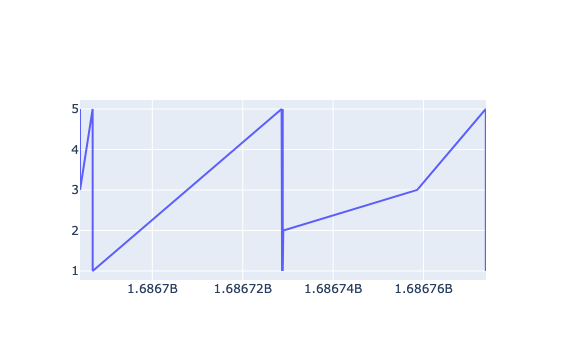

In [31]:
plot('lsst.sal.MTAirCompressor.logevent_summaryState', results, 'summaryState')


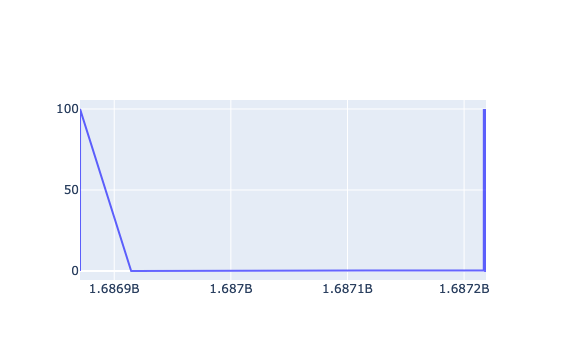

In [30]:
plot('lsst.sal.MTM1M3.logevent_raisingLoweringInfo', results, 'weightSupportedPercent')
